In [1]:
!pip install chromedriver_binary==87.0.4280.88

In [2]:
#import vital tools
from selenium import webdriver
import chromedriver_binary
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'IPAPGothic'
%matplotlib inline

#browser open (chrome)
browser=webdriver.Chrome(r"/Users/mossa/github/CyberAgent_stock_predict/chromedriver")

#ready for scraping
columnNames=[]
ETFComparisonsTable=[]
for num in range(99):
    browser.get("https://kabuoji3.com/stock/")
    stockSearch=browser.find_element_by_class_name("form_inputs")
    stockSearchForm=stockSearch.find_element_by_class_name("form_txt")
    stockSearchForm.send_keys("ETF")
    btnClick=browser.find_element_by_class_name("btn_submit")
    btnClick.click()

    #choose a stock out of list
    stockClick=browser.find_elements_by_class_name("clickable")
    if stockClick[num] == stockClick[-1]:
        break
    stockClick[num].find_element_by_tag_name("a").click()

    stockTable=browser.find_element_by_class_name("table_wrap")
    stockLine=stockTable.find_elements_by_tag_name("tr")

    #price scraping with calculation
    if len(stockLine)==302:
        ETFComparisons=[]
        for i in range(2,152):
            stockETFPriceAfter=stockLine[i-1].find_elements_by_tag_name("td")
            stockETFPriceBefore=stockLine[i].find_elements_by_tag_name("td")
            ETFComparison=float(stockETFPriceAfter[6].text)-float(stockETFPriceBefore[6].text)
            ETFComparisons.append(ETFComparison)

        stockETFPriceAfter=stockLine[151].find_elements_by_tag_name("td")
        stockETFPriceBefore=stockLine[153].find_elements_by_tag_name("td")
        ETFComparison=float(stockETFPriceAfter[6].text)-float(stockETFPriceBefore[6].text)
        ETFComparisons.append(ETFComparison)

        for i in range(154,302):
            stockETFPriceAfter=stockLine[i-1].find_elements_by_tag_name("td")
            stockETFPriceBefore=stockLine[i].find_elements_by_tag_name("td")
            ETFComparison=float(stockETFPriceAfter[6].text)-float(stockETFPriceBefore[6].text)
            ETFComparisons.append(ETFComparison)

        ETFComparisonsTable.append(ETFComparisons)

        #pick up title
        stockTitleBox=browser.find_element_by_class_name("base_box_ttl")
        stockTitle=stockTitleBox.find_element_by_class_name("jp").text
        columnNames.append(stockTitle)

#making ETF table
ETFTable=pd.DataFrame(ETFComparisonsTable)
ETFTable=ETFTable.T
ETFTable.columns=columnNames
#checking ETF table
ETFTable.head()

,1329 iシェアーズ・コア 日経225ETF,1364 ｉシェアーズ JPX日経400 ETF,1385 UBS ETF ユーロ圏大型株50(E･ストックス50),1388 UBS ETF ユーロ圏小型株(MSCI EMU小型株),1390 UBS ETF MSCIアジア太平洋株(除く日本),1392 UBS ETF 英国株(MSCI英国),1394 UBS ETF 先進国株(MSCIワールド),1459 楽天 ETF-日経ダブルインバース指数連動型,1474 One ETF JPX日経400,1475 iシェアーズ・コア TOPIX ETF,...,1575 ChinaAMC CSI 300 Index ETF-JDR,1576 南方 FTSE 中国A株 50 ETF,1577 (NEXT FUNDS)野村日本株高配当70連動型ETF,1655 iシェアーズ S&P500 米国株 ETF,1656 iシェアーズ･コア 米国債7-10年 ETF,1658 iシェアーズ･コア MSCI 新興国株 ETF,1659 iシェアーズ 米国リート ETF,2516 東証マザーズETF,2522 iシェアーズ オートメーション&ロボット ETF,2555 東証REIT ETF
0,140.0,90.0,-5.0,240.0,-5.0,6.0,1190.0,-27.0,80.0,10.0,...,6.0,17.0,50.0,17.0,-8.0,-3.0,0.0,2.0,-5.0,13.0
1,20.0,50.0,15.0,-260.0,5.0,57.0,-440.0,-5.0,30.0,5.0,...,29.0,-4.0,100.0,3.0,2.0,6.0,16.0,1.0,10.0,10.0
2,250.0,110.0,95.0,130.0,0.0,67.0,-140.0,-38.0,150.0,13.0,...,-22.0,6.0,-10.0,20.0,2.0,11.0,22.0,33.0,65.0,18.0
3,-310.0,-200.0,-60.0,-300.0,45.0,-19.0,-50.0,46.0,-250.0,-30.0,...,-8.0,-9.0,-290.0,-29.0,-3.0,-37.0,-16.0,-40.0,-35.0,0.0
4,-60.0,-80.0,-60.0,0.0,20.0,-66.0,540.0,7.0,-30.0,-7.0,...,-2.0,-11.0,-100.0,2.0,-1.0,6.0,-41.0,-7.0,0.0,-7.0


In [3]:
#date scraping
browser.get("https://kabuoji3.com/stock/{}/".format(4751))
stockTable=browser.find_element_by_class_name("table_wrap")
stockLine=stockTable.find_elements_by_tag_name("tr")
dates=[]
for i in range(1,152):
    stockDate=stockLine[i].find_elements_by_tag_name("td")
    stockDate=stockDate[0].text
    dates.append(stockDate)
for i in range(153,302):
    stockDate=stockLine[i].find_elements_by_tag_name("td")
    stockDate=stockDate[0].text
    dates.append(stockDate)
df_date=pd.DataFrame()
df_date["date"]=dates
df_date["year"]=df_date["date"].apply(lambda x:int(x.split("-")[0]))
df_date["month"]=df_date["date"].apply(lambda x:int(x.split("-")[1]))
df_date["day"]=df_date["date"].apply(lambda x:int(x.split("-")[2]))
df_date.head()

,date,year,month,day
0,2020-12-28,2020,12,28
1,2020-12-25,2020,12,25
2,2020-12-24,2020,12,24
3,2020-12-22,2020,12,22
4,2020-12-21,2020,12,21


In [4]:
#stock scraping (comparison with yesterday)
browser.get("https://kabuoji3.com/stock/{}/".format(4751))
stockTable=browser.find_element_by_class_name("table_wrap")
stockLine=stockTable.find_elements_by_tag_name("tr")
targetStockComparisons=[]
for i in range(2,152):
    targetStockPriceAfter=stockLine[i-1].find_elements_by_tag_name("td")
    targetStockPriceBefore=stockLine[i].find_elements_by_tag_name("td")
    targetStockComparison=float(targetStockPriceAfter[6].text)-float(targetStockPriceBefore[6].text)
    targetStockComparisons.append(targetStockComparison)
targetStockPriceAfter=stockLine[151].find_elements_by_tag_name("td")
targetStockPriceBefore=stockLine[153].find_elements_by_tag_name("td")
targetStockComparison=float(targetStockPriceAfter[6].text)-float(targetStockPriceBefore[6].text)
targetStockComparisons.append(targetStockComparison)
for i in range(154,302):
    targetStockPriceAfter=stockLine[i-1].find_elements_by_tag_name("td")
    targetStockPriceBefore=stockLine[i].find_elements_by_tag_name("td")
    targetStockComparison=float(targetStockPriceAfter[6].text)-float(targetStockPriceBefore[6].text)
    targetStockComparisons.append(targetStockComparison)
df=pd.DataFrame(targetStockComparisons)
df.columns=["サイバーエージェント：前日比"]
df.head()

,サイバーエージェント：前日比
0,60.0
1,-20.0
2,210.0
3,-250.0
4,50.0


In [5]:
#add table
stockPriceTable=pd.concat([df_date,ETFTable],axis=1)
stockPriceTable=pd.concat([stockPriceTable,df],axis=1)
stockPriceTable.head()

,date,year,month,day,1329 iシェアーズ・コア 日経225ETF,1364 ｉシェアーズ JPX日経400 ETF,1385 UBS ETF ユーロ圏大型株50(E･ストックス50),1388 UBS ETF ユーロ圏小型株(MSCI EMU小型株),1390 UBS ETF MSCIアジア太平洋株(除く日本),1392 UBS ETF 英国株(MSCI英国),...,1576 南方 FTSE 中国A株 50 ETF,1577 (NEXT FUNDS)野村日本株高配当70連動型ETF,1655 iシェアーズ S&P500 米国株 ETF,1656 iシェアーズ･コア 米国債7-10年 ETF,1658 iシェアーズ･コア MSCI 新興国株 ETF,1659 iシェアーズ 米国リート ETF,2516 東証マザーズETF,2522 iシェアーズ オートメーション&ロボット ETF,2555 東証REIT ETF,サイバーエージェント：前日比
0,2020-12-28,2020,12,28,140.0,90.0,-5.0,240.0,-5.0,6.0,...,17.0,50.0,17.0,-8.0,-3.0,0.0,2.0,-5.0,13.0,60.0
1,2020-12-25,2020,12,25,20.0,50.0,15.0,-260.0,5.0,57.0,...,-4.0,100.0,3.0,2.0,6.0,16.0,1.0,10.0,10.0,-20.0
2,2020-12-24,2020,12,24,250.0,110.0,95.0,130.0,0.0,67.0,...,6.0,-10.0,20.0,2.0,11.0,22.0,33.0,65.0,18.0,210.0
3,2020-12-22,2020,12,22,-310.0,-200.0,-60.0,-300.0,45.0,-19.0,...,-9.0,-290.0,-29.0,-3.0,-37.0,-16.0,-40.0,-35.0,0.0,-250.0
4,2020-12-21,2020,12,21,-60.0,-80.0,-60.0,0.0,20.0,-66.0,...,-11.0,-100.0,2.0,-1.0,6.0,-41.0,-7.0,0.0,-7.0,50.0


In [6]:
#prepare for making target values
df_next=df.copy()
df_next.columns=["サイバーエージェント：翌日比"]

#date scraping for target values
browser.get("https://kabuoji3.com/stock/{}/".format(4751))
stockTable=browser.find_element_by_class_name("table_wrap")
stockLine=stockTable.find_elements_by_tag_name("tr")
dates=[]
for i in range(2,152):
    stockDate=stockLine[i].find_elements_by_tag_name("td")
    stockDate=stockDate[0].text
    dates.append(stockDate)
for i in range(153,302):
    stockDate=stockLine[i].find_elements_by_tag_name("td")
    stockDate=stockDate[0].text
    dates.append(stockDate)
df_date2=pd.DataFrame()
df_date2["date"]=dates

#making target values table
df_next=pd.concat([df_date2,df_next],axis=1)
df_next.index=df_date2["date"]

#prepare for complete table
table=stockPriceTable[1:299].copy()
table.index=table["date"]

#making complete table
table["サイバーエージェント：翌日比"]=df_next["サイバーエージェント：翌日比"]
table.tail()

,date,year,month,day,1329 iシェアーズ・コア 日経225ETF,1364 ｉシェアーズ JPX日経400 ETF,1385 UBS ETF ユーロ圏大型株50(E･ストックス50),1388 UBS ETF ユーロ圏小型株(MSCI EMU小型株),1390 UBS ETF MSCIアジア太平洋株(除く日本),1392 UBS ETF 英国株(MSCI英国),...,1577 (NEXT FUNDS)野村日本株高配当70連動型ETF,1655 iシェアーズ S&P500 米国株 ETF,1656 iシェアーズ･コア 米国債7-10年 ETF,1658 iシェアーズ･コア MSCI 新興国株 ETF,1659 iシェアーズ 米国リート ETF,2516 東証マザーズETF,2522 iシェアーズ オートメーション&ロボット ETF,2555 東証REIT ETF,サイバーエージェント：前日比,サイバーエージェント：翌日比
date,,,,,,,,,,,,,,,,,,,,,
2019-10-09,2019-10-09,2019,10,9,-150.0,-20.0,-35.0,-80.0,150.0,-14.0,...,30.0,-41.0,1.0,-24.0,-16.0,-7.0,-45.0,26.0,-70.0,-35.0
2019-10-08,2019-10-08,2019,10,8,240.0,80.0,80.0,-20.0,10.0,6.0,...,150.0,20.0,6.0,15.0,13.0,7.0,30.0,-2.0,-60.0,-70.0
2019-10-07,2019-10-07,2019,10,7,-30.0,80.0,0.0,-100.0,-105.0,16.0,...,-30.0,20.0,0.0,3.0,13.0,-3.0,5.0,11.0,50.0,-60.0
2019-10-04,2019-10-04,2019,10,4,60.0,20.0,10.0,-10.0,-50.0,-8.0,...,-440.0,12.0,2.0,12.0,8.0,10.0,13.0,8.0,45.0,50.0
2019-10-03,2019-10-03,2019,10,3,-430.0,-320.0,-100.0,-100.0,55.0,-80.0,...,-290.0,-56.0,-1.0,-22.0,-20.0,-11.0,-36.0,3.0,-90.0,45.0


In [7]:
#making csv file
table.to_csv("stockPriceData.csv",index=False)

In [8]:
#import vital tools
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from selenium import webdriver
import requests
import json

#reading csv file (*ETF=Exhange Traded Funds)
train=pd.read_csv("stockPriceData.csv")
train.head()

,date,year,month,day,1329 iシェアーズ・コア 日経225ETF,1364 ｉシェアーズ JPX日経400 ETF,1385 UBS ETF ユーロ圏大型株50(E･ストックス50),1388 UBS ETF ユーロ圏小型株(MSCI EMU小型株),1390 UBS ETF MSCIアジア太平洋株(除く日本),1392 UBS ETF 英国株(MSCI英国),...,1577 (NEXT FUNDS)野村日本株高配当70連動型ETF,1655 iシェアーズ S&P500 米国株 ETF,1656 iシェアーズ･コア 米国債7-10年 ETF,1658 iシェアーズ･コア MSCI 新興国株 ETF,1659 iシェアーズ 米国リート ETF,2516 東証マザーズETF,2522 iシェアーズ オートメーション&ロボット ETF,2555 東証REIT ETF,サイバーエージェント：前日比,サイバーエージェント：翌日比
0,2020-12-25,2020,12,25,20.0,50.0,15.0,-260.0,5.0,57.0,...,100.0,3.0,2.0,6.0,16.0,1.0,10.0,10.0,-20.0,60.0
1,2020-12-24,2020,12,24,250.0,110.0,95.0,130.0,0.0,67.0,...,-10.0,20.0,2.0,11.0,22.0,33.0,65.0,18.0,210.0,-20.0
2,2020-12-22,2020,12,22,-310.0,-200.0,-60.0,-300.0,45.0,-19.0,...,-290.0,-29.0,-3.0,-37.0,-16.0,-40.0,-35.0,0.0,-250.0,210.0
3,2020-12-21,2020,12,21,-60.0,-80.0,-60.0,0.0,20.0,-66.0,...,-100.0,2.0,-1.0,6.0,-41.0,-7.0,0.0,-7.0,50.0,-250.0
4,2020-12-18,2020,12,18,-50.0,-10.0,0.0,300.0,-110.0,5.0,...,60.0,4.0,4.0,-2.0,9.0,5.0,10.0,-8.0,-10.0,50.0


In [9]:
df = pd.read_csv("stockPriceData.csv")
dfd = df.reset_index().T.reset_index().T.values.tolist().pop(0)
del dfd[0:5]
print(dfd)

['1329 iシェアーズ・コア 日経225ETF', '1364 ｉシェアーズ JPX日経400 ETF', '1385 UBS ETF ユーロ圏大型株50(E･ストックス50)', '1388 UBS ETF ユーロ圏小型株(MSCI EMU小型株)', '1390 UBS ETF MSCIアジア太平洋株(除く日本)', '1392 UBS ETF 英国株(MSCI英国)', '1394 UBS ETF 先進国株(MSCIワールド)', '1459 楽天 ETF-日経ダブルインバース指数連動型', '1474 One ETF JPX日経400', '1475 iシェアーズ・コア TOPIX ETF', '1476 iシェアーズ・コア Ｊリート ETF', '1478 iシェアーズ MSCI ジャパン高配当利回り ETF', '1483 iシェアーズ JPX/S&P 設備･人材投資ETF', '1484 One ETF JPX/S&P 設備･人材投資指数', '1489 (NEXT FUNDS)日経平均高配当株50指数連動型ETF', '1493 One ETF JPX日経中小型', '1494 One ETF 高配当日本株', '1496 iシェアーズ 米ドル建て投資適格社債ETF(H有)', '1497 iシェアーズ 米ドル建ハイイールド社債ETF(H有)', '1552 国際のETF VIX短期先物指数', '1557 SPDR S&P500 ETF', '1575 ChinaAMC CSI 300 Index ETF-JDR', '1576 南方 FTSE 中国A株 50 ETF', '1577 (NEXT FUNDS)野村日本株高配当70連動型ETF', '1655 iシェアーズ S&P500 米国株 ETF', '1656 iシェアーズ･コア\u3000米国債7-10年 ETF', '1658 iシェアーズ･コア MSCI 新興国株 ETF', '1659 iシェアーズ 米国リート ETF', '2516 東証マザーズETF', '2522 iシェアーズ オートメーション&ロボット ETF', '2555 東証REIT ETF', 'サイバーエージェント：前日比', 'サイバーエージェント：翌日比']


確率：44.44444444444444%
1388 UBS ETF ユーロ圏小型株(MSCI EMU小型株)      0.073667
1575 ChinaAMC CSI 300 Index ETF-JDR    0.072601
2516 東証マザーズETF                         0.071112
1392 UBS ETF 英国株(MSCI英国)               0.065645
1390 UBS ETF MSCIアジア太平洋株(除く日本)         0.060384
1394 UBS ETF 先進国株(MSCIワールド)            0.051100
1385 UBS ETF ユーロ圏大型株50(E･ストックス50)      0.045012
1659 iシェアーズ 米国リート ETF                  0.044520
1364 ｉシェアーズ JPX日経400 ETF               0.034857
1658 iシェアーズ･コア MSCI 新興国株 ETF           0.033746
1483 iシェアーズ JPX/S&P 設備･人材投資ETF         0.032877
1484 One ETF JPX/S&P 設備･人材投資指数         0.032421
1496 iシェアーズ 米ドル建て投資適格社債ETF(H有)         0.032121
1552 国際のETF VIX短期先物指数                  0.029719
1493 One ETF JPX日経中小型                  0.028987
1576 南方 FTSE 中国A株 50 ETF               0.028916
1497 iシェアーズ 米ドル建ハイイールド社債ETF(H有)        0.028270
1478 iシェアーズ MSCI ジャパン高配当利回り ETF        0.028228
1656 iシェアーズ･コア　米国債7-10年 ETF            0.026165
1476 iシェアーズ・コア Ｊリート ETF                0.023178
1474 One ETF JPX日経

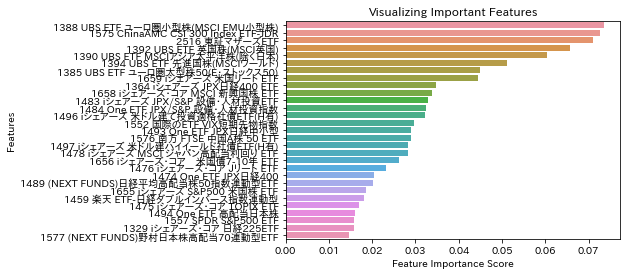

<Figure size 2160x3600 with 0 Axes>

In [15]:
#ready for making machine learning model
features = dfd
del features[-1]
x=train[features]
y=train["サイバーエージェント：翌日比"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.27)

#model making and prediction
model=RandomForestRegressor(n_estimators=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

#make result score and get accuracy score
testUpDown=[]
for test in y_test:
    if test>0:
        testUpDown.append(1)
    else:
        testUpDown.append(-1)
predUpDown=[]
for pred in y_pred:
    if pred>0:
        predUpDown.append(1)
    else:
        predUpDown.append(-1)
print("確率："+str(metrics.accuracy_score(testUpDown,predUpDown)*100)+"%")

#feature evaluation and plots
feature_imp = pd.Series(model.feature_importances_,index=features).sort_values(ascending=False)
print(feature_imp)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.figure(figsize=(30,50))
plt.rcParams['font.family'] = 'IPAPGothic'
plt.tight_layout()
plt.show()

In [11]:
#ready for scraping
browser=webdriver.Chrome()
columnNames=[]
ETFComparisonsTable=[]
ETFfeatures = features.copy()
del ETFfeatures[-1]
for feature in ETFfeatures:
    feature=feature.split(" ")[0]

    browser.get("https://kabuoji3.com/stock/{}/".format(feature))
    stockTable=browser.find_element_by_class_name("table_wrap")
    stockLine=stockTable.find_elements_by_tag_name("tr")

    #price scraping with calculation
    if len(stockLine)==302:
        ETFComparisons=[]
        stockETFPriceAfter=stockLine[1].find_elements_by_tag_name("td")
        stockETFPriceBefore=stockLine[2].find_elements_by_tag_name("td")
        ETFComparison=float(stockETFPriceAfter[6].text)-float(stockETFPriceBefore[6].text)
        ETFComparisons.append(ETFComparison)
        ETFComparisonsTable.append(ETFComparisons)

        #pick up title
        stockTitleBox=browser.find_element_by_class_name("base_box_ttl")
        stockTitle=stockTitleBox.find_element_by_class_name("jp").text
        columnNames.append(stockTitle)

#making ETF table
ETFTable=pd.DataFrame(ETFComparisonsTable)
ETFTable=ETFTable.T
ETFTable.columns=columnNames


#date scraping and stock scraping (comparison with yesterday)
browser.get("https://kabuoji3.com/stock/{}/".format(4751))
stockTable=browser.find_element_by_class_name("table_wrap")
stockLine=stockTable.find_elements_by_tag_name("tr")

dates=[]
stockDate=stockLine[1].find_elements_by_tag_name("td")
stockDate=stockDate[0].text
dates.append(stockDate)

df_date=pd.DataFrame()
df_date["date"]=dates
df_date["year"]=df_date["date"].apply(lambda x:int(x.split("-")[0]))
df_date["month"]=df_date["date"].apply(lambda x:int(x.split("-")[1]))
df_date["day"]=df_date["date"].apply(lambda x:int(x.split("-")[2]))

targetStockComparisons=[]
targetStockPriceAfter=stockLine[1].find_elements_by_tag_name("td")
targetStockPriceBefore=stockLine[2].find_elements_by_tag_name("td")
targetStockComparison=float(targetStockPriceAfter[6].text)-float(targetStockPriceBefore[6].text)
targetStockComparisons.append(targetStockComparison)

df=pd.DataFrame(targetStockComparisons)
df.columns=["サイバーエージェント：前日比"]

#add table
stockPriceTable=pd.concat([df_date,ETFTable],axis=1)
stockPriceTable=pd.concat([stockPriceTable,df],axis=1)


#ready for future price prediction
valueX=stockPriceTable[features]
pred=model.predict(valueX)
print(pred)
#make result score and get accuracy score
predPriceUpDown="?"
if pred>0:
    predPriceUpDown="上昇"
else:
    predPriceUpDown="下落"

#telling result
resultNotification="株価予測:「4751:サイバーエージェント」\n"+stockDate+"現時点での予測値は"+str(float(targetStockPriceAfter[6].text)+float(pred))+"円。\nよって価格は"+predPriceUpDown+"見込みです。"
print(resultNotification)
browser.quit()

[8.63]
株価予測:「4751:サイバーエージェント」
2020-12-28現時点での予測値は7028.63円。
よって価格は上昇見込みです。


In [ ]:
slackURL="yourid"

def send_slack(content):
    payload={
        "text":content,
        "username":"PythonStockForecast",
        "icon_emoji":":snake:"
    }
    data=json.dumps(payload)
    requests.post(slackURL,data)
send_slack(resultNotification)